<a href="https://colab.research.google.com/github/ChenHsieh/COLAB_notebooks/blob/main/dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# comparing PCA and UMAP

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
input_table = pd.read_csv("/content/uniq_counts.tsv", sep='\t', index_col=0)
input_table
# input_table.set_index("gene")

,barkpri_717_counts,barksec_717_counts,bud_717_counts,callus_717_counts,debarkedpri_717_counts,leafexp_717_counts,leafmat_717_counts,leafnew_717_counts,roottip_717_counts,shoottip_717_counts,xylem_717_counts
gene,,,,,,,,,,,
Ptralav11000001m.g,0,0,0,0,0,0,0,0,0,0,0
Ptralav11000002m.g,0,1,0,0,0,0,0,0,0,2,0
Ptralav11000004m.g,694,942,1918,1607,1049,583,309,629,829,1416,621
Ptralav11000005m.g,4,4,1,5,28,8,27,17,12,28,17
Ptralav11000006m.g,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
Ptralpv11077054m.g,4,0,3,1,12,3,0,19,2,36,2
Ptralpv11077058m.g,0,1,0,1,0,0,0,0,0,0,0
Ptralpv11077059m.g,0,0,0,0,0,0,0,0,0,0,0


In [11]:
%%time

# PCA

from sklearn.preprocessing import StandardScaler
input_data = input_table.values.transpose()
x = StandardScaler().fit_transform(input_data)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

CPU times: user 209 ms, sys: 218 ms, total: 428 ms
Wall time: 245 ms


In [20]:
treatment_list = list(input_table.columns)
principalDf.shape

(11, 2)

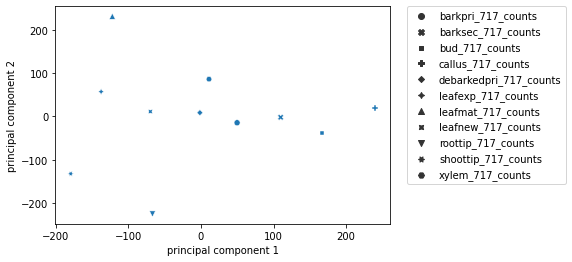

In [25]:
# visualize PCA result 

# append some attributes of each sample for visualization
principalDf['treatment'] = treatment_list
sns.scatterplot(
    data=principalDf,
    x='principal component 1',
    y='principal component 2',
    # hue='tissue',
    style='treatment'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [4]:
!pip install umap-learn

In [10]:
%%time

# UMAP

import umap
reducer = umap.UMAP()
input_data = input_table.values.transpose()
scaled_input_data = StandardScaler().fit_transform(input_data)
embedding = reducer.fit_transform(scaled_input_data)
embedding.shape

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


CPU times: user 3.17 s, sys: 25 ms, total: 3.2 s
Wall time: 3.16 s


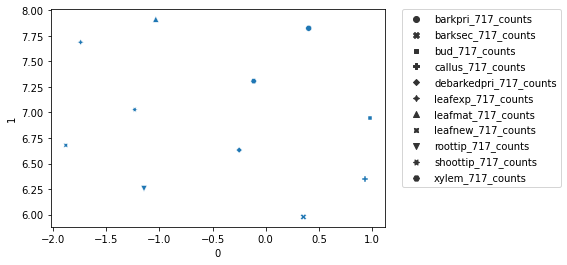

In [22]:
# visualize UMAP result
eb = pd.DataFrame(embedding)
# eb['tissue'] = tissue_list

# subs = ['na']*11
# for i in range(len(subs)):
#     treatment_list[i] = subs[i]
eb['treatment'] = treatment_list
sns.scatterplot(
    data=eb,
    x=0,
    y=1,
    # hue='tissue',
    style='treatment'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)